<a href="https://colab.research.google.com/github/Akshatpattiwar512/Natural-Language-Processing/blob/main/AutoDiff_and_Dynamic_Subclassed_Models_PyTorch_Vs_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn

## Generating Linear Data

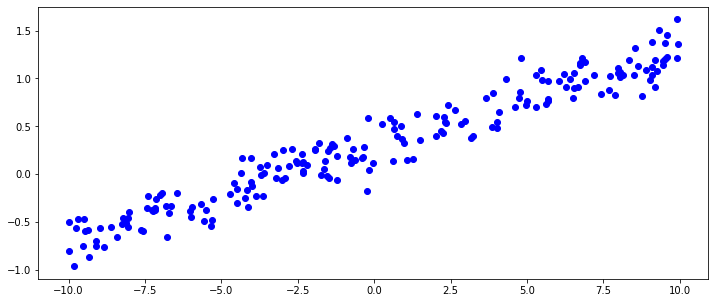

In [ ]:
def generate_data(m=0.1, b=0.3, n=200):
  x = np.random.uniform(-10, 10, n)
  noise = np.random.normal(0, 0.15, n)
  y = (m * x + b ) + noise
  return x.astype(np.float32), y.astype(np.float32)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")

## TensorFlow Dynamic Model

In [ ]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.w = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        self.b = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))

    def __call__(self,x): 
        return x * self.w + self.b

## PyTorch Dynamic Model

In [ ]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1).uniform_(-0.1, 0.1))
        self.b = torch.nn.Parameter(torch.Tensor(1).uniform_(-0.1, 0.1))
  
    def forward(self, x):  
        return x @ self.w + self.b

## TensorFlow Training

In [ ]:
epochs = 500
learning_rate = 0.001

In [ ]:
@tf.function
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))
    # diff = y_pred - y_true
    # return tf.math.reduce_sum(diff * diff) / tf.size(diff, out_type=tf.dtypes.float32)

tf_model = LinearRegressionKeras()
[w, b] = tf_model.trainable_variables

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    w_grad, b_grad = tape.gradient(loss, tf_model.trainable_variables)

    w.assign(w - w_grad * learning_rate)
    b.assign(b - b_grad * learning_rate)

    if epoch % 20 == 0:
        print(f"Epoch {epoch} : Loss {loss.numpy()}")

Epoch 0 : Loss 0.5376505851745605
Epoch 20 : Loss 0.09716752916574478
Epoch 40 : Loss 0.07002957165241241
Epoch 60 : Loss 0.06525202095508575
Epoch 80 : Loss 0.061925116926431656
Epoch 100 : Loss 0.05891207605600357
Epoch 120 : Loss 0.056133970618247986
Epoch 140 : Loss 0.05356979742646217
Epoch 160 : Loss 0.05120294541120529
Epoch 180 : Loss 0.049018215388059616
Epoch 200 : Loss 0.047001589089632034
Epoch 220 : Loss 0.04514013230800629
Epoch 240 : Loss 0.043421898037195206
Epoch 260 : Loss 0.041835885494947433
Epoch 280 : Loss 0.04037191718816757
Epoch 300 : Loss 0.0390206016600132
Epoch 320 : Loss 0.0377732515335083
Epoch 340 : Loss 0.03662189096212387
Epoch 360 : Loss 0.035559121519327164
Epoch 380 : Loss 0.034578122198581696
Epoch 400 : Loss 0.03367260470986366
Epoch 420 : Loss 0.03283676132559776
Epoch 440 : Loss 0.032065242528915405
Epoch 460 : Loss 0.031353097409009933
Epoch 480 : Loss 0.030695734545588493


## PyTorch Training

In [ ]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))

In [ ]:
def squared_error(y_pred, y_true):
    return torch.mean(torch.square(y_pred - y_true))
    # diff = y_pred - y_true
    # return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

for epoch in range(epochs):
    y_pred = torch_model(inputs)
    loss = squared_error(y_pred, labels)

    loss.backward()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print(f"Epoch {epoch} : Loss {loss.data}")

Epoch 0 : Loss 0.602177619934082
Epoch 20 : Loss 0.14518003165721893
Epoch 40 : Loss 0.11373063176870346
Epoch 60 : Loss 0.10555744171142578
Epoch 80 : Loss 0.09912742674350739
Epoch 100 : Loss 0.09325169771909714
Epoch 120 : Loss 0.08783125877380371
Epoch 140 : Loss 0.0828280821442604
Epoch 160 : Loss 0.07820989936590195
Epoch 180 : Loss 0.07394705712795258
Epoch 200 : Loss 0.07001223415136337
Epoch 220 : Loss 0.06638018786907196
Epoch 240 : Loss 0.06302759796380997
Epoch 260 : Loss 0.05993299186229706
Epoch 280 : Loss 0.057076502591371536
Epoch 300 : Loss 0.054439812898635864
Epoch 320 : Loss 0.05200600624084473
Epoch 340 : Loss 0.04975947365164757
Epoch 360 : Loss 0.047685813158750534
Epoch 380 : Loss 0.045771706849336624
Epoch 400 : Loss 0.04400486871600151
Epoch 420 : Loss 0.04237399250268936
Epoch 440 : Loss 0.040868617594242096
Epoch 460 : Loss 0.03947906568646431
Epoch 480 : Loss 0.038196440786123276


## Data Visualization

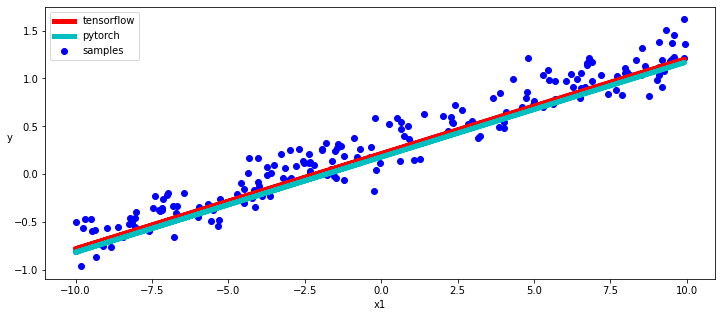

In [ ]:
[w_tf, b_tf] = tf_model.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)

## TensorFlow Model with Linear layer

In [ ]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.linear = tf.keras.layers.Dense(1, activation=None) # , input_shape=[1]

    def call(self, x): 
        return self.linear(x)

## PyTorch Model with Linear layer

In [ ]:
class LinearRegressionPyTorch(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

## TensorFlow Fit with real Loss function and Optimizer

In [ ]:
tf_model_fit = LinearRegressionKeras()
tf_model_fit.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate), loss='mean_absolute_error')
# tf_model_fit.build(input_shape=(None, 1))
# tf_model_fit.summary()
tf_model_fit.fit(x, y, epochs=epochs, batch_size=x.shape[0], verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 241ms/step - loss: 9.2792
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 9.2529
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 9.2266
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 9.2003
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 9.1740
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 9.1477
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 9.1214
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 9.0950
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 9.0687
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 9.0424
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 9.0161
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 8.9898
Epoch 13/500
1/1 [==============================] - 0s 3ms

## TensorFlow Training with real Loss function and Optimizer

In [ ]:
tf_model_train_loop = LinearRegressionKeras()

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

for epoch in range(epochs * 3):
    x_batch = tf.reshape(x, [200, 1])
    with tf.GradientTape() as tape:
        y_pred = tf_model_train_loop(x_batch)
        y_pred = tf.reshape(y_pred, [200])
        loss = tf.losses.mse(y_pred, y)
    
    grads = tape.gradient(loss, tf_model_train_loop.variables)
    
    optimizer.apply_gradients(grads_and_vars=zip(grads, tf_model_train_loop.variables))

    if epoch % 20 == 0:
        print(f"Epoch {epoch} : Loss {loss.numpy()}")

Epoch 0 : Loss 82.69005584716797
Epoch 20 : Loss 4.518627166748047
Epoch 40 : Loss 0.3362100124359131
Epoch 60 : Loss 0.10713094472885132
Epoch 80 : Loss 0.08969253301620483
Epoch 100 : Loss 0.0839611366391182
Epoch 120 : Loss 0.07922450453042984
Epoch 140 : Loss 0.07488191872835159
Epoch 160 : Loss 0.07087507843971252
Epoch 180 : Loss 0.06717661768198013
Epoch 200 : Loss 0.06376276910305023
Epoch 220 : Loss 0.06061159074306488
Epoch 240 : Loss 0.05770289525389671
Epoch 260 : Loss 0.05501801148056984
Epoch 280 : Loss 0.05253970995545387
Epoch 300 : Loss 0.05025211721658707
Epoch 320 : Loss 0.04814053699374199
Epoch 340 : Loss 0.04619142413139343
Epoch 360 : Loss 0.04439229518175125
Epoch 380 : Loss 0.04273160919547081
Epoch 400 : Loss 0.041198719292879105
Epoch 420 : Loss 0.039783775806427
Epoch 440 : Loss 0.03847770765423775
Epoch 460 : Loss 0.0372721366584301
Epoch 480 : Loss 0.03615932539105415
Epoch 500 : Loss 0.03513215109705925
Epoch 520 : Loss 0.03418401628732681
Epoch 540 : Los

## PyTorch Training with real Loss function and Optimizer

In [ ]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))

In [ ]:
torch_model = LinearRegressionPyTorch()

criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs * 3):
    y_pred = torch_model(inputs)
    loss = criterion(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
      print(f"Epoch {epoch} : Loss {loss.data}")

Epoch 0 : Loss 39.753440856933594
Epoch 20 : Loss 2.464742660522461
Epoch 40 : Loss 0.44802144169807434
Epoch 60 : Loss 0.3175978362560272
Epoch 80 : Loss 0.28969496488571167
Epoch 100 : Loss 0.26888012886047363
Epoch 120 : Loss 0.24993090331554413
Epoch 140 : Loss 0.23245389759540558
Epoch 160 : Loss 0.21632246673107147
Epoch 180 : Loss 0.2014322727918625
Epoch 200 : Loss 0.18768787384033203
Epoch 220 : Loss 0.17500106990337372
Epoch 240 : Loss 0.16329044103622437
Epoch 260 : Loss 0.15248093008995056
Epoch 280 : Loss 0.14250317215919495
Epoch 300 : Loss 0.13329316675662994
Epoch 320 : Loss 0.12479185312986374
Epoch 340 : Loss 0.11694467812776566
Epoch 360 : Loss 0.10970132797956467
Epoch 380 : Loss 0.10301532596349716
Epoch 400 : Loss 0.09684380888938904
Epoch 420 : Loss 0.09114715456962585
Epoch 440 : Loss 0.0858888253569603
Epoch 460 : Loss 0.08103511482477188
Epoch 480 : Loss 0.07655490189790726
Epoch 500 : Loss 0.07241940498352051
Epoch 520 : Loss 0.06860212981700897
Epoch 540 : L

## Data Visualization

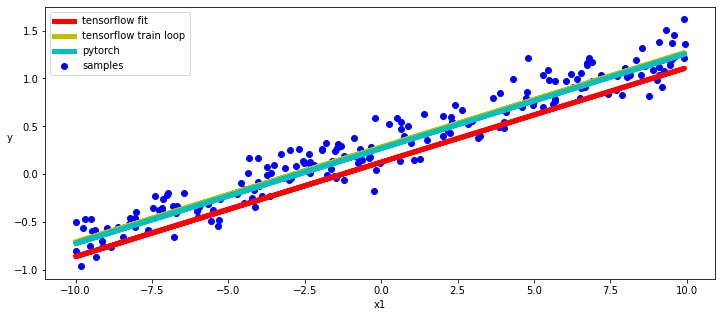

In [ ]:
[w_tf, b_tf] = tf_model_fit.trainable_variables
[w2_tf, b2_tf] = tf_model_train_loop.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

w_tf = tf.reshape(w_tf, [1])
w2_tf = tf.reshape(w2_tf, [1])

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow fit")
  ax.plot(x, w2_tf * x + b2_tf, "y", linewidth = 5.0, label = "tensorflow train loop")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)